<sup>This notebook is originally from https://github.com/lizanafj/POE_techniques and licensed for reuse under [MIT license].</sup>

# Ventilation diagnosis
---

This notebook is part of a set of data-based fault detection and diagnosis techniques. 

Specifically, this notebook performs a **$CO_{2}$ concentration analysis to identify inappropriate ventilation periods**.

In [1]:
import os

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

import datetime


# get folder location of script
cwd = os.getcwd()

## Import data
---
Import required data to perform the analysis

In [2]:
#Access to folder with data: 
os.chdir(cwd)
cwd_data = cwd+r"\Data"
os.chdir(cwd_data)

In [3]:
#data
int_data=pd.read_csv('HH_Indoor_Office_CO2sensor_2.csv',sep=";",index_col = "Time", parse_dates=True).tz_localize(None)

## Explore data
---
See variables, datetime, and data structure.

In [4]:
#See dataframe
int_data.head()

,Temp,RH,CO2
Time,,,
2022-05-06 11:00:00,25.817000,55.240000,455.955000
2022-05-06 12:00:00,25.457500,54.989250,416.655500
2022-05-06 13:00:00,25.333333,52.857667,400.155333
2022-05-06 14:00:00,25.629750,47.698000,413.641500
2022-05-06 15:00:00,25.743750,44.170500,402.409250


<AxesSubplot:xlabel='Time'>

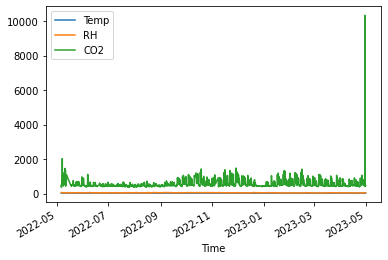

In [5]:
#Visualise variable
int_data.plot()

## Data pre-processing
---

Filtering and cleaning steps before the analysis 


In [6]:
#truncate timeframe
int_data = int_data.truncate(before="2022-10-01",after="2023-03-31")

In [24]:
#Auxiliar variables
int_data["week_day"] = int_data.index.dayofweek
int_data["hour_day"] = int_data.index.hour
int_data["occupancy"] = np.where((int_data["hour_day"] > 8) & (int_data["hour_day"] < 18) & (int_data["week_day"]<5), 1, 0)

In [25]:
int_data.head()

,Temp,RH,CO2,week_day,hour_day,occupancy,discomfort
Time,,,,,,,
2022-10-01 00:00:00,19.45600,55.26400,557.13250,5,0,0,0
2022-10-01 01:00:00,19.25100,55.16175,536.89675,5,1,0,0
2022-10-01 02:00:00,19.03275,55.10025,525.16700,5,2,0,0
2022-10-01 03:00:00,18.91325,55.14500,506.85200,5,3,0,0
2022-10-01 04:00:00,18.78700,55.28725,493.53125,5,4,0,0


## Data diagnosis
---
Identification of inappropriate indoor air quality periods, with CO2 above 1000ppm

In [26]:
#Select only data associated with working hours
int_data_sel = int_data[(int_data["occupancy"]==1)]

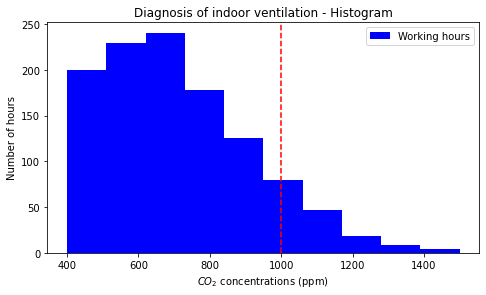

In [30]:
#Plot data distribution during working hours - histogram
fig=plt.figure()
ax=fig.add_axes([0,0,1,0.8])

ax.hist(int_data_sel["CO2"],bins=10,range=(400,1500),color="b",label="Working hours")

ax.set_xlabel('$CO_{2}$ concentrations (ppm)')
ax.set_ylabel('Number of hours')
ax.set_title('Diagnosis of indoor ventilation - Histogram')
ax.legend()

plt.axvline(x=1000, color='r', linestyle='--')

plt.show()

In [28]:
#Statistics
int_data["discomfort"] = np.where((int_data["CO2"]>1000) & (int_data["occupancy"]==1), 1, 0)

bad_ventilation = int_data["discomfort"].values.sum()/int_data["occupancy"].values.sum()

In [29]:
print("Percentage of time with CO2 > 1000: ",round(bad_ventilation,4)*100,"%")

Percentage of time with CO2 > 1000:  10.51 %
